# Part 1

In [1]:
import random
import numpy
import math
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Generate Distribution Functions

In [2]:
def sorted_indexes(payoffs):
    vals_indexes=[]
    ind_by_val = []

    for i in range(len(payoffs)):
        vals_indexes.append([payoffs[i],i])
    
    vals_indexes.sort(reverse=True)
    for x in vals_indexes:
        ind_by_val.append(x[1])
    return ind_by_val

def find_min_index(payoffs):
    min_value = min(payoffs)
    min_index = payoffs.index(min_value)
    return min_index


def generate_adversarial_payoffs(num_actions, num_rounds):
    rounds_list = []
    totals_by_round = []
    initial_payoff = round(random.random(), 2)
    first_payoffs = [0 for i in range(num_actions)]
    first_payoffs[random.randrange(num_actions)] = initial_payoff
    total_payoffs = [first_payoffs[i] for i in range(num_actions)]
    min_index = find_min_index(total_payoffs)
    rounds_list.append(first_payoffs)
    totals_by_round.append([total_payoffs[i] for i in range(num_actions)])
    
    for i in range(num_rounds - 1):
        new_payoff = round(random.random(), 2)
        adversarial_payoffs = [0 for i in range(num_actions)]
        adversarial_payoffs[min_index] = new_payoff
        for i in range(num_actions):
            total_payoffs[i] += adversarial_payoffs[i]
            total_payoffs[i] = round(total_payoffs[i], 2)
        
        min_index = find_min_index(total_payoffs)
        new_totals = [total_payoffs[i] for i in range(num_actions)]
        totals_by_round.append(new_totals)
        rounds_list.append(adversarial_payoffs)

    #print("utility at each round: \n", rounds_list)
    #print("totals by round: \n", totals_by_round)
    #print("final payoffs: \n", total_payoffs)
    return rounds_list, totals_by_round


#generate_adversarial_payoffs(10, 10)

In [3]:
#when generating the bernoulli payoffs, generate the payoffs of each action at each round and the 
#total payoffs up to that point for each action. i.e. list of lists of payoffs/round & list of lists of aggregated payoffs.
#uncomment the last line of the generate_adversarial_payoffs section for an example
def find_payoff(success_chance):
    comparison_val = random.random()
    return int(success_chance > comparison_val)

def generate_bernoulli_payoffs(num_actions, num_rounds):
    rounds_list = []
    totals_by_round = []
    total_payoffs = [0 for i in range(num_actions)]
    totals_by_round = []
    action_success_chances = [round(random.random() / 2,2) for i in range(num_actions)]
    
    for i in range(num_rounds):
        new_payoffs = [find_payoff(action_success_chances[j]) for j in range(num_actions)]
        
        for i in range(num_actions):
            total_payoffs[i] += new_payoffs[i]
            total_payoffs[i] = round(total_payoffs[i], 2)
        
        new_totals = [total_payoffs[i] for i in range(num_actions)]
        totals_by_round.append(new_totals)
        rounds_list.append(new_payoffs)

    #print("utility at each round: \n", rounds_list)
    #print("totals by round: \n", totals_by_round)
    #print("final payoffs: \n", total_payoffs)
    return rounds_list, totals_by_round

#generate_bernoulli_payoffs(3, 3)



In [4]:
def rotate_action_payoffs(action_payoffs):
    copy_payoffs = [action_payoffs[i] for i in range(len(action_payoffs))]
    for i in range(0, len(action_payoffs)):
        action_payoffs[i] = copy_payoffs[i-1]
    return action_payoffs

def generate_rotational_random_payoffs(num_actions, num_rounds):
    rounds_list = []
    totals_by_round = []
    action_payoffs = [round(random.random(), 2) for i in range(num_actions)]
    total_payoffs = [0 for i in range(num_actions)]
    
    for i in range(num_rounds):
        if random.random() > 0.9:
            action_payoffs = rotate_action_payoffs(action_payoffs)
            
        for i in range(num_actions):
            total_payoffs[i] += action_payoffs[i]
            total_payoffs[i] = round(total_payoffs[i], 2)
        new_totals = [total_payoffs[i] for i in range(num_actions)]    
        rounds_list.append([action_payoffs[i] for i in range(num_actions)])
        totals_by_round.append(new_totals)
        
    return rounds_list, totals_by_round


## Simulate Algorithm Behavior Functions

In [5]:
def simulate_exponential_weights(rounds_list, totals_by_round, epsilon, max_payoff):
    num_rounds = len(rounds_list)
    num_actions = len(rounds_list[0])
    choices_made = []
    action_weights = []
    action_probabilities = [(1/num_actions) for i in range(num_actions)]
    current_weights = [1 for i in range(num_actions)]
    action_weights.append(current_weights)
    alg_payoffs = []
    opt_payoffs = []
    
    for round in range(1, num_rounds):
        last_round = round - 1
        current_weights = [None for i in range(num_actions)]
        for action in range(num_actions):
            V_last = totals_by_round[last_round][action]
            exp = V_last / max_payoff
            current_weights[action] = pow(1 + epsilon, exp)
        #randomly select from actions using weights as probabilities
        selected_payoff = random.choices(rounds_list[round], weights=current_weights, k=1)[0]
        alg_payoffs.append(selected_payoff)  
        opt_payoffs.append(max(rounds_list[round]))
        action_weights.append(current_weights)
        
    return alg_payoffs, totals_by_round, opt_payoffs

## Regret Visual Analysis Function

In [6]:
def visualize_regret(avg_regret_per_round, rounds, learning_rates, plot_title, file_name):
    
    add_str = ''
    for i in range(len(learning_rates)):
        if i == 3: 
            each_lr = round(learning_rates[i], 2)
            add_str = '(theor opt learn rate)'
        else: 
            each_lr = learning_rates[i]
            add_str = ''
        #print(each_lr)
        x = np.array(list(range(1, rounds)))
        y = np.array(avg_regret_per_round[learning_rates[i]])
        plt.plot(x, y, label='learning rate = {each_lr} {add_str}'.format(each_lr=each_lr, add_str = add_str), linewidth=1)
    plt.xlabel("Round")
    plt.ylabel("Regret")
    plt.title(plot_title)
    plt.legend(loc='best', prop={'size': 7})
    
    plt.savefig(file_name)

    plt.show()

## Monte Carlo Trials

- Declare size of inputs
- Generate payoffs
- For each learning rate $\{\epsilon_1, . . ., \epsilon_n\}$
    - For each input
        - Simulate the algorithm
        - calculate OPT (best in hindsight payoff)
        - calculate the algorithm's regret
    - Calculate the average regret for this learning rate $\epsilon$

In [7]:
def sum_to_round_i(alg_payoffs, current_round):
    total = 0
    for i in range(current_round):
        total += alg_payoffs[i]
    return total

def individual_regrets(alg_payoffs, round_totals):
    final_payoffs = round_totals[-1]
    opt_action = final_payoffs.index(max(final_payoffs))
    #print(opt_action)
    individual_regrets = [0 for i in range(len(alg_payoffs))]
    for round in range((len(alg_payoffs))):
        individual_regrets[round] = (round_totals[round][opt_action] - sum_to_round_i(alg_payoffs, round)) / (round + 1)
    return individual_regrets

In [8]:
rounds = 100
actions = 5
N = 1000
# ADD OPTIMAL LEARNING RATE EPSILON
opt_lr_eps = math.sqrt(numpy.log(actions)/rounds)
learning_rates = [0, 0.25, 0.5, opt_lr_eps, 0.75, 1, 100]

In [9]:
#adversarial monte carlo trial
max_payoff = 1
avg_lr_payoffs = dict()
all_opt_payoffs = []
avg_regret_per_round = dict()
avg_regret_per_round_1 = dict()
for n in range(N):
    adversarial_payoffs, adversarial_totals = generate_adversarial_payoffs(actions, rounds)
    for epsilon in learning_rates:
        adv_payoffs, adv_round_totals, adv_opt = simulate_exponential_weights(adversarial_payoffs, adversarial_totals, epsilon, max_payoff)
        adv_regrets = individual_regrets(adv_payoffs, adv_round_totals)
        adv_avg_regrets = sum(adv_regrets) / len(adv_regrets)
        adv_final_regret = adv_regrets[-1]
        adv_regrets_1 = []
        for i in range(len(adv_payoffs)):
            adv_regrets_1.append(adv_opt[i] - adv_payoffs[i])
        
        if epsilon not in avg_regret_per_round_1:
            avg_regret_per_round_1[epsilon] = adv_regrets_1
        else:
            for i in range(len(avg_regret_per_round_1[epsilon])):
                avg_regret_per_round_1[epsilon][i] = ((n * avg_regret_per_round_1[epsilon][i]) + adv_regrets_1[i]) / (n + 1)
                
        if epsilon not in avg_regret_per_round:
            avg_regret_per_round[epsilon] = adv_regrets
        else:
            for i in range(len(avg_regret_per_round[epsilon])):
                avg_regret_per_round[epsilon][i] = ((n * avg_regret_per_round[epsilon][i]) + adv_regrets[i]) / (n + 1)            
        
        if epsilon not in avg_lr_payoffs:
            avg_lr_payoffs[epsilon] = [sum(adv_payoffs)]
        else:
            avg_lr_payoffs[epsilon].append(sum(adv_payoffs))
    all_opt_payoffs.append(max(adv_round_totals[-1]))
for key, val in avg_regret_per_round.items():
    print("Average ALG regret for epsilon =", key, "on adversarial distribution =", val[-1])

for key, val in avg_lr_payoffs.items():
    print("Average ALG payoff for epsilon =", key, "on adversarial distribution =", sum(val) / len(val))
print("Average OPT payoff for adversarial distribution =", sum(all_opt_payoffs) / len(all_opt_payoffs))  

Average ALG regret for epsilon = 0 on adversarial distribution = 0.0015426262626262641
Average ALG regret for epsilon = 0.25 on adversarial distribution = 0.009504444444444447
Average ALG regret for epsilon = 0.5 on adversarial distribution = 0.012465353535353552
Average ALG regret for epsilon = 0.12686362411795196 on adversarial distribution = 0.005342323232323233
Average ALG regret for epsilon = 0.75 on adversarial distribution = 0.01647474747474747
Average ALG regret for epsilon = 1 on adversarial distribution = 0.01884858585858586
Average ALG regret for epsilon = 100 on adversarial distribution = 0.08071808080808081
Average ALG payoff for epsilon = 0 on adversarial distribution = 9.989979999999985
Average ALG payoff for epsilon = 0.25 on adversarial distribution = 9.209669999999988
Average ALG payoff for epsilon = 0.5 on adversarial distribution = 8.89975000000001
Average ALG payoff for epsilon = 0.12686362411795196 on adversarial distribution = 9.606449999999995
Average ALG payoff

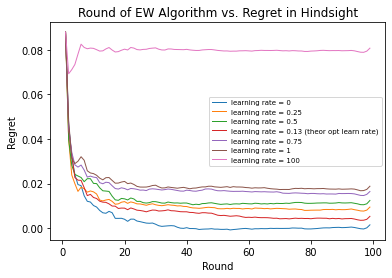

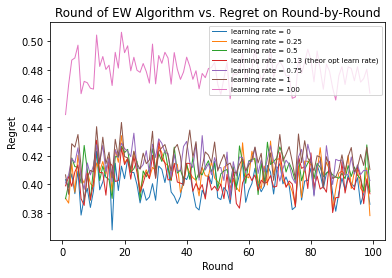

In [10]:
visualize_regret(avg_regret_per_round, rounds, learning_rates,'Round of EW Algorithm vs. Regret in Hindsight','adv_plot_1.png')
visualize_regret(avg_regret_per_round_1, rounds, learning_rates, 'Round of EW Algorithm vs. Regret on Round-by-Round', 'adv_plot_2.png')

In [11]:
#bernoulli monte carlo trial
max_payoff = 1
avg_lr_payoffs = dict()
all_opt_payoffs = []
avg_regret_per_round = dict()
avg_regret_per_round_1 = dict()

for n in range(N):
    bernoulli_payoffs, bernoulli_totals = generate_bernoulli_payoffs(actions, rounds)
    for epsilon in learning_rates:
        bern_payoffs, bern_round_totals, bern_opt = simulate_exponential_weights(bernoulli_payoffs, bernoulli_totals, epsilon, max_payoff)
        bern_regrets = individual_regrets(bern_payoffs, bern_round_totals)
        bern_avg_regrets = sum(bern_regrets) / len(bern_regrets)
        bern_final_regret = bern_regrets[-1]
        bern_regrets_1 = []
        for i in range(len(adv_payoffs)):
            bern_regrets_1.append(bern_opt[i] - bern_payoffs[i])
        
        if epsilon not in avg_regret_per_round_1:
            avg_regret_per_round_1[epsilon] = bern_regrets_1
        else:
            for i in range(len(avg_regret_per_round_1[epsilon])):
                avg_regret_per_round_1[epsilon][i] = ((n * avg_regret_per_round_1[epsilon][i]) + bern_regrets_1[i]) / (n + 1)
        
        if epsilon not in avg_regret_per_round:
            avg_regret_per_round[epsilon] = bern_regrets
        else:
            for i in range(len(avg_regret_per_round[epsilon])):
                avg_regret_per_round[epsilon][i] = ((n * avg_regret_per_round[epsilon][i]) + bern_regrets[i]) / (n + 1)
        
        if epsilon not in avg_lr_payoffs:
            avg_lr_payoffs[epsilon] = [sum(bern_payoffs)]
        else:
            avg_lr_payoffs[epsilon].append(sum(bern_payoffs))
    
    all_opt_payoffs.append(max(bern_round_totals[-1]))
for key, val in avg_regret_per_round.items():
    print("Average ALG regret for epsilon =", key, "on bernoulli distribution =", val[-1])
for key, val in avg_lr_payoffs.items():
    print("Average ALG payoff for epsilon =", key, "on bernoulli distribution =", sum(val) / len(val))
print("Average OPT payoff for bernoulli distribution =", sum(all_opt_payoffs) / len(all_opt_payoffs) )

Average ALG regret for epsilon = 0 on bernoulli distribution = 0.1765858585858609
Average ALG regret for epsilon = 0.25 on bernoulli distribution = 0.07390909090909198
Average ALG regret for epsilon = 0.5 on bernoulli distribution = 0.056222222222222916
Average ALG regret for epsilon = 0.12686362411795196 on bernoulli distribution = 0.10060606060606182
Average ALG regret for epsilon = 0.75 on bernoulli distribution = 0.049303030303030945
Average ALG regret for epsilon = 1 on bernoulli distribution = 0.047020202020202635
Average ALG regret for epsilon = 100 on bernoulli distribution = 0.03612121212121254
Average ALG payoff for epsilon = 0 on bernoulli distribution = 25.143
Average ALG payoff for epsilon = 0.25 on bernoulli distribution = 35.431
Average ALG payoff for epsilon = 0.5 on bernoulli distribution = 37.2
Average ALG payoff for epsilon = 0.12686362411795196 on bernoulli distribution = 32.764
Average ALG payoff for epsilon = 0.75 on bernoulli distribution = 37.874
Average ALG pay

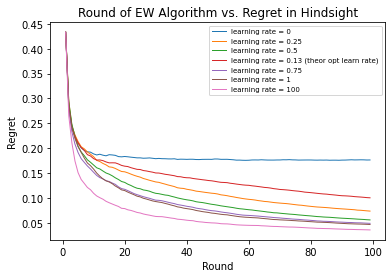

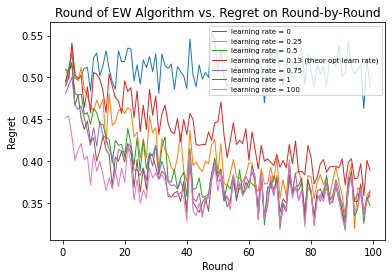

In [12]:
visualize_regret(avg_regret_per_round, rounds, learning_rates, 'Round of EW Algorithm vs. Regret in Hindsight', 'bern_plot_1.png')
visualize_regret(avg_regret_per_round_1, rounds, learning_rates, 'Round of EW Algorithm vs. Regret on Round-by-Round', 'bern_plot_2.png')

In [13]:
# rotational generation monte carlo trial
generate_rotational_random_payoffs
max_payoff = 1
avg_lr_payoffs = dict()
all_opt_payoffs = []
avg_regret_per_round = dict()
for n in range(N):
    rotational_payoffs, rotational_totals = generate_rotational_random_payoffs(actions, rounds)
    for epsilon in learning_rates:
        rot_payoffs, rot_round_totals, rot_opt = simulate_exponential_weights(rotational_payoffs, rotational_totals, epsilon, max_payoff)
        rot_regrets = individual_regrets(rot_payoffs, rot_round_totals)
        rot_avg_regrets = sum(rot_regrets) / len(rot_regrets)
        rot_final_regret = rot_regrets[-1]
        if epsilon not in avg_regret_per_round:
            avg_regret_per_round[epsilon] = rot_regrets
        else:
            for i in range(len(avg_regret_per_round[epsilon])):
                avg_regret_per_round[epsilon][i] = ((n * avg_regret_per_round[epsilon][i]) + rot_regrets[i]) / (n + 1)
                
        rot_regrets_1 = []
        for i in range(len(adv_payoffs)):
            rot_regrets_1.append(rot_opt[i] - rot_payoffs[i])
        
        if epsilon not in avg_regret_per_round_1:
            avg_regret_per_round_1[epsilon] = rot_regrets_1
        else:
            for i in range(len(avg_regret_per_round_1[epsilon])):
                avg_regret_per_round_1[epsilon][i] = ((n * avg_regret_per_round_1[epsilon][i]) + rot_regrets_1[i]) / (n + 1)
        
        if epsilon not in avg_lr_payoffs:
            avg_lr_payoffs[epsilon] = [sum(rot_payoffs)]
        else:
            avg_lr_payoffs[epsilon].append(sum(rot_payoffs))
    
    all_opt_payoffs.append(max(rot_round_totals[-1]))
for key, val in avg_regret_per_round.items():
    print("Average ALG regret for epsilon =", key, "on rotational random distribution =", val[-1])
for key, val in avg_lr_payoffs.items():
    print("Average ALG payoff for epsilon =", key, "on rotational random distribution =", sum(val) / len(val))
print("Average OPT payoff for rotational random distribution =", sum(all_opt_payoffs) / len(all_opt_payoffs) )


Average ALG regret for epsilon = 0 on rotational random distribution = 0.09946757575757577
Average ALG regret for epsilon = 0.25 on rotational random distribution = 0.05622060606060609
Average ALG regret for epsilon = 0.5 on rotational random distribution = 0.04319565656565652
Average ALG regret for epsilon = 0.12686362411795196 on rotational random distribution = 0.07202484848484843
Average ALG regret for epsilon = 0.75 on rotational random distribution = 0.03720535353535353
Average ALG regret for epsilon = 1 on rotational random distribution = 0.033812323232323166
Average ALG regret for epsilon = 100 on rotational random distribution = 0.018601818181818185
Average ALG payoff for epsilon = 0 on rotational random distribution = 49.10596999999999
Average ALG payoff for epsilon = 0.25 on rotational random distribution = 53.424669999999985
Average ALG payoff for epsilon = 0.5 on rotational random distribution = 54.70854999999997
Average ALG payoff for epsilon = 0.12686362411795196 on rota

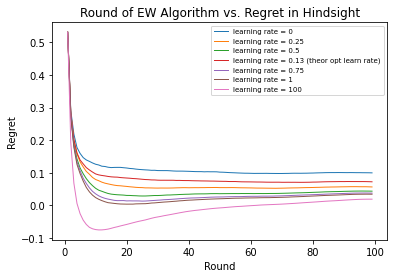

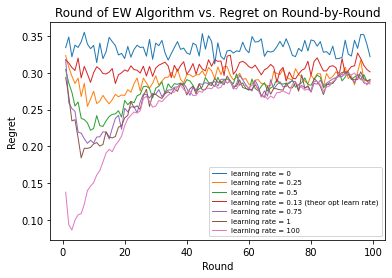

In [14]:
visualize_regret(avg_regret_per_round, rounds, learning_rates, 'Round of EW Algorithm vs. Regret in Hindsight', 'rot_plot_1.png')
visualize_regret(avg_regret_per_round_1, rounds, learning_rates, 'Round of EW Algorithm vs. Regret on Round-by-Round', 'rot_plot_2.png')


# Part 2C. Data in the wild

## Data Cleaning 

In [15]:
#Stock dataset taken from https://www.kaggle.com/datasets/camnugent/sandp500?select=all_stocks_5yr.csv

df = pd.read_csv('all_stocks_5yr.csv') 

df = df.query('date.str.startswith("2017")', 
engine="python")

# resetting index
df.reset_index(inplace = True)

df['Day']=df.groupby(['Name']).cumcount()+1

#Add payoffs of each stock each day as column 

df['payoff'] = np.where(df['close'] / df['open'] >= 1, 1, 0)

#get the number of total stocks
df.drop_duplicates(subset = ["Name"]).shape[0]

#get the number of total stocks
df.drop_duplicates(subset = ["Name"]).shape[0]

#Max payoff value

df['payoff'].max()

#query stocks by date or day
df[df['Day'] == 1]

df

#identify stocks that do not have full year stock prices data

temp = df[df['Day'] == 1]
temp = temp['Name'].tolist()

temp_2 = df[df['Day'] == 251]
temp_2 = temp_2['Name'].tolist()

print('Stocks that do not have data for all dates throughout the year: ', ','.join(set(temp).difference(temp_2)))

#drop outlier stocks with not enough data

df = df.drop(df[df.Name == 'BHF'].index)
df = df.drop(df[df.Name == 'DXC'].index) 
df = df.drop(df[df.Name == 'HLT'].index) 
df = df.drop(df[df.Name == 'APTV'].index) 
df = df.drop(df[df.Name == 'DWDP'].index) 
df = df.drop(df[df.Name == 'BHGE'].index) 

df 

Stocks that do not have data for all dates throughout the year:  APTV,BHF,DWDP,DXC,HLT,BHGE


,index,date,open,high,low,close,volume,Name,Day,payoff
0,982,2017-01-03,47.28,47.340,46.135,46.30,6737752,AAL,1,0
1,983,2017-01-04,46.63,47.435,46.350,46.70,5859604,AAL,2,1
2,984,2017-01-05,46.52,46.930,45.610,45.89,6825316,AAL,3,0
3,985,2017-01-06,45.85,46.720,45.470,46.21,7260197,AAL,4,1
4,986,2017-01-09,46.01,47.340,45.780,47.08,4739142,AAL,5,1
...,...,...,...,...,...,...,...,...,...,...
126027,619009,2017-12-22,72.30,72.370,71.790,71.99,1345683,ZTS,247,0
126028,619010,2017-12-26,72.40,72.550,71.900,72.34,792134,ZTS,248,0
126029,619011,2017-12-27,72.59,72.690,72.250,72.45,1159771,ZTS,249,0
126030,619012,2017-12-28,72.49,72.600,72.140,72.39,710499,ZTS,250,0


In [16]:
#identify range of all stocks starting with A

range_ds = df

# get the unique values (rows)
range_ds = range_ds.drop_duplicates(subset = ["Name"])

#First 11 stocks starting with A 
range_ds = range_ds.head(11)

#first stock
range_ds.head(1)['Name']

#last stock
range_ds.iloc[-1]['Name']

#index of last day of 10th stock

index = range_ds.index[-1]

index

#slice first 10 stocks 

df = df[:index]

df

,index,date,open,high,low,close,volume,Name,Day,payoff
0,982,2017-01-03,47.28,47.3400,46.1350,46.30,6737752,AAL,1,0
1,983,2017-01-04,46.63,47.4350,46.3500,46.70,5859604,AAL,2,1
2,984,2017-01-05,46.52,46.9300,45.6100,45.89,6825316,AAL,3,0
3,985,2017-01-06,45.85,46.7200,45.4700,46.21,7260197,AAL,4,1
4,986,2017-01-09,46.01,47.3400,45.7800,47.08,4739142,AAL,5,1
...,...,...,...,...,...,...,...,...,...,...
2505,12559,2017-12-22,40.25,40.4059,40.0900,40.19,1728787,ADM,247,0
2506,12560,2017-12-26,40.22,40.5000,40.1700,40.26,1301973,ADM,248,1
2507,12561,2017-12-27,40.34,40.4200,40.0900,40.24,1289620,ADM,249,0
2508,12562,2017-12-28,40.21,40.2900,40.0400,40.27,1629966,ADM,250,1


## Applying EW algorithm to stock data with payoffs 

In [17]:
def generate_stock_payoffs(dataset, num_actions):
    rounds_list = []
    totals_by_round = []
    total_payoffs = [0 for i in range(num_actions)]
    day = 1
    list_of_dates = []
    while day <= 251:
        temp_ds = dataset[dataset['Day'] == day]
        #print(len(temp_ds['payoff'].tolist()))
        if len(temp_ds['payoff'].tolist()) != num_actions: 
            day += 1
            #print(day)
            continue
        else: 
            list_of_dates.append(temp_ds['date'].iloc[0])
            action_payoffs = temp_ds['payoff'].tolist()
            #print(len(action_payoffs),'action payoffs')
            #print(len(total_payoffs),'total_payoffs')
            #print(day)
            for j in range(num_actions): 
                total_payoffs[j] += action_payoffs[j]
            new_totals = [total_payoffs[i] for i in range(num_actions)]    
            rounds_list.append([action_payoffs[i] for i in range(num_actions)])
            totals_by_round.append(new_totals)
            day += 1

    return rounds_list, totals_by_round, list_of_dates

#generate_stock_payoffs(df, 10)

In [23]:
actions = 10
N = 1000
rounds = 251

#optimal learning rate epsilon 𝜀 = √(ln k / n)
opt_lr_eps = math.sqrt(numpy.log(actions)/rounds)

learning_rates = [0, 0.25, 0.5, opt_lr_eps, 0.75, 1, 100]

max_payoff = 1 #max payoff of all stocks
#max_payoff = 11.678064176749078
avg_lr_payoffs = dict()
all_opt_payoffs = []
avg_regret_per_round = dict()
list_of_dates = []
#for n in range(N):
stock_payoffs, stock_totals, date_list = generate_stock_payoffs(df, actions)
for epsilon in learning_rates:
    sto_payoffs, sto_round_totals, sto_opt_payoffs = simulate_exponential_weights(stock_payoffs, stock_totals, epsilon, max_payoff)
    sto_regrets = individual_regrets(sto_payoffs, sto_round_totals)
    sto_avg_regrets = sum(sto_regrets) / len(sto_regrets)
    sto_final_regret = sto_regrets[-1]
    if epsilon not in avg_regret_per_round:
        avg_regret_per_round[epsilon] = sto_regrets
    else:
        for i in range(len(avg_regret_per_round[epsilon])):
            avg_regret_per_round[epsilon][i] = ((n * avg_regret_per_round[epsilon][i]) + sto_regrets[i]) / (n + 1)

    if epsilon not in avg_lr_payoffs:
        avg_lr_payoffs[epsilon] = [sum(sto_payoffs)]
    else:
        avg_lr_payoffs[epsilon].append(sum(sto_payoffs))
list_of_dates = date_list
    
all_opt_payoffs.append(max(sto_round_totals[-1]))
for key, val in avg_regret_per_round.items():
    print("Average ALG regret for epsilon =", key, "on stock data =", val[-1])
for key, val in avg_lr_payoffs.items():
    print("Average ALG payoff for epsilon =", key, "on stock data =", sum(val) / len(val))
print("Average OPT payoff for on stock data =", sum(all_opt_payoffs) / len(all_opt_payoffs) )
print("The list of dates where you are investing are the following...",  list_of_dates)
print("The number of days that you are investing is ",  len(list_of_dates))

Average ALG regret for epsilon = 0 on stock data = 0.052
Average ALG regret for epsilon = 0.25 on stock data = 0.048
Average ALG regret for epsilon = 0.5 on stock data = 0.036
Average ALG regret for epsilon = 0.09577915111766705 on stock data = 0.036
Average ALG regret for epsilon = 0.75 on stock data = 0.056
Average ALG regret for epsilon = 1 on stock data = 0.04
Average ALG regret for epsilon = 100 on stock data = 0.024
Average ALG payoff for epsilon = 0 on stock data = 135.0
Average ALG payoff for epsilon = 0.25 on stock data = 136.0
Average ALG payoff for epsilon = 0.5 on stock data = 139.0
Average ALG payoff for epsilon = 0.09577915111766705 on stock data = 139.0
Average ALG payoff for epsilon = 0.75 on stock data = 135.0
Average ALG payoff for epsilon = 1 on stock data = 139.0
Average ALG payoff for epsilon = 100 on stock data = 143.0
Average OPT payoff for on stock data = 149.0
The list of dates where you are investing are the following... ['2017-01-03', '2017-01-04', '2017-01-0

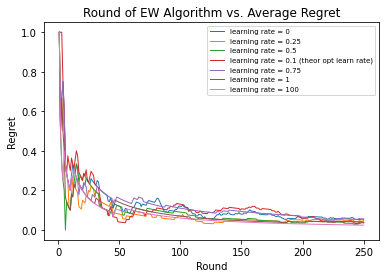

In [24]:
visualize_regret(avg_regret_per_round, rounds, learning_rates, 'Round of EW Algorithm vs. Average Regret', 'stock_plot.png')